### Seaborn

Seaborn is a visualization library, which is built on top of matplotlib. It has good support for more complex plots.

We will work with a data set of the passengers of the Titanic and the dataset can be obtained from [Kaggle website](https://www.kaggle.com/c/titanic/data).

In [2]:
import pandas as pd

titanic = pd.read_csv("Data/train.csv")

We need to remove columns like Name and Ticket that there is no way to visualize.

We also need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.


In [3]:
# # keep only the following columns:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna(axis=0) # remove rows containing missing values.

titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call `pyplot.show().`

We can generate a histogram of the Fare column using the `seaborn.distplot()` function:

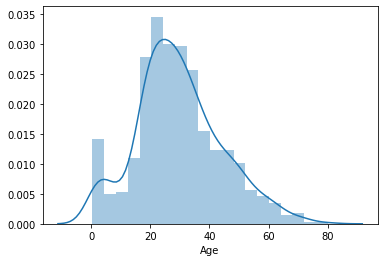

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(titanic["Age"])
plt.show()

The resulting line is a smoother version of the histogram, called a [kernel density plot](https://en.wikipedia.org/wiki/Kernel_density_estimation).

Displaying both the histogram and the kernel density plot is useful when we want to explore the data. However, it can be burdensome for viewers. To generate just the kernel density plot, we use the `seaborn.kdeplot()` function and shade the area under the line using a single color by setting the shade parameter to True.

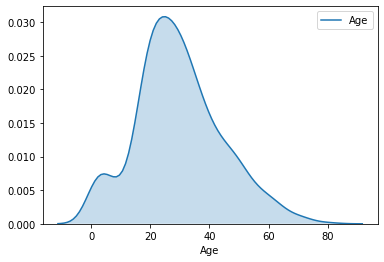

In [5]:
sns.kdeplot(titanic["Age"], shade =True)
plt.xlabel("Age") # This time we need to set xlabel.
plt.show()

We can use the `seaborn.set_style()` function to change the default seaborn style sheet which is "ticks":

* darkgrid: Coordinate grid displayed, dark background color
* whitegrid: Coordinate grid displayed, white background color
* dark: Coordinate grid hidden, dark background color
* white: Coordinate grid hidden, white background color
* ticks: Coordinate grid hidden, white background color, ticks visible

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the `seaborn.despine()` function. By default, only the top and right axes will be despined. To despine the other two axes, we need to set the left and bottom parameters to True.

Let's change seaborn style sheet to white (remove the ticks) anddespine all the axes.

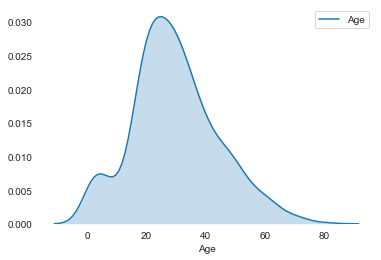

In [6]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade =True)
plt.xlabel("Age") # This time we need to set xlabel.
sns.despine(left =True, bottom=True)
plt.show()

### Small multiple

Small multiple is a group of plots that have the same axis scales so the viewer can compare plots effectively. 

We can create a grid of plots that displays the age distributions for each class.

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values:

`sns.FacetGrid(titanic, col="Pclass", size=6)`

Setting the col parameter to "Pclass" specifies a separate plot for each unique value in the 'Pclass' column. Setting the size parameter to 6 specifies a height of 6 inches for each plot. Once we've created the grid, we use the `FacetGrid.map()` method to specify the plot we want for each unique value of `Pclass`. Seaborn generates one kernel density plot for the ages of passengers for each passenger class.

`FacetGrid.map(sns.kdeplot, "Age", shade=True)`

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

`g = sns.FacetGrid(titanic, col="Pclass", size=6)`

`g.map(plt.hist, "Age")`

Let's create a grid of plots that displays the age distributions for each class.

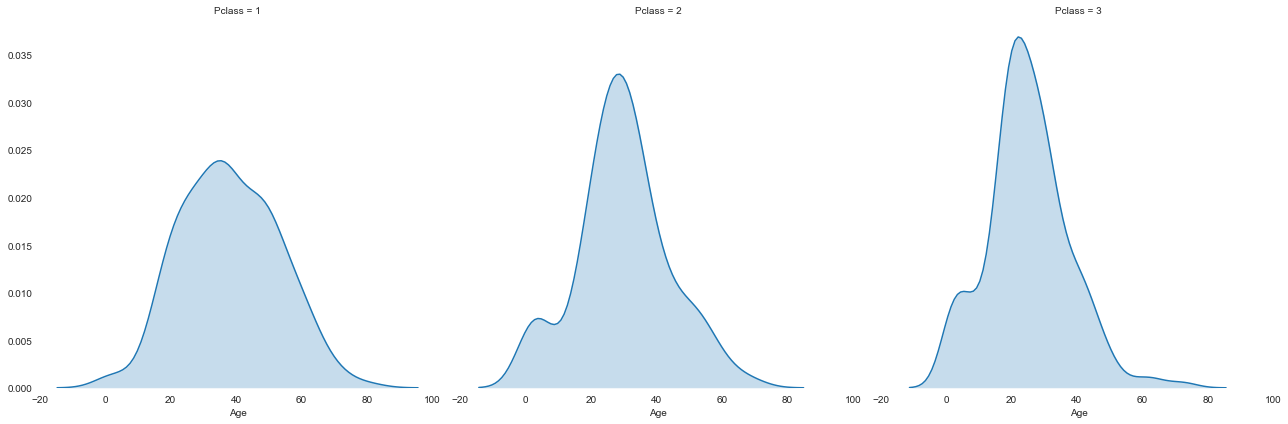

In [12]:
g = sns.FacetGrid(titanic, col="Pclass", height=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left =True, bottom=True)
plt.show()

### Two or more conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid.

Let's look for different combinations of unique values in both the "Pclass" and "Survived" columns.

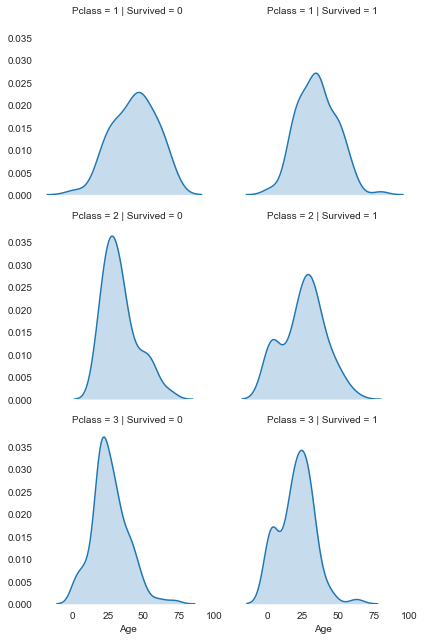

In [8]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left =True, bottom=True)
plt.show()

We can switch the cols with the rows. 

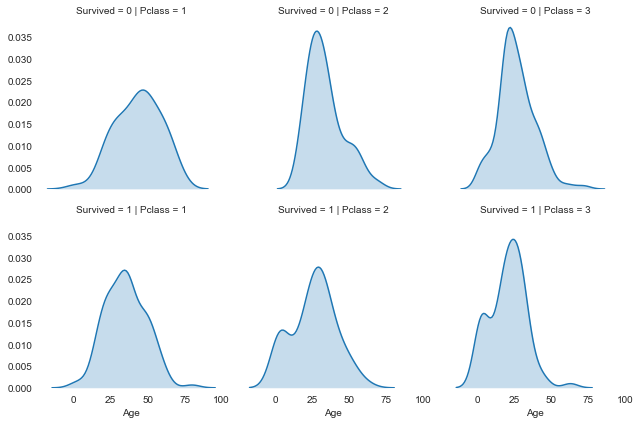

In [9]:
g = sns.FacetGrid(titanic, col="Pclass", row="Survived")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left =True, bottom=True)
plt.show()

### More than two conditions

We can add a condition just by setting the "hue" parameter to the column name from the dataframe.

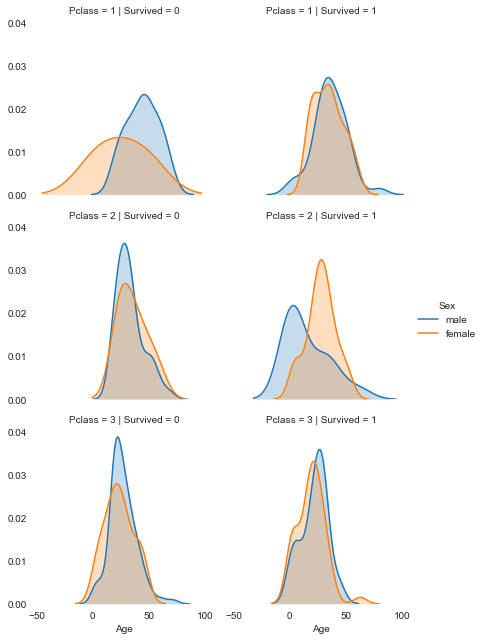

In [10]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left =True, bottom=True)
plt.show()

### Box plots 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

An ***outlier*** is defined as a data point that is located outside the fences (“whiskers”) of the boxplot (outside 1.5 times the interquartile range above the upper quartile and bellow the lower quartile).

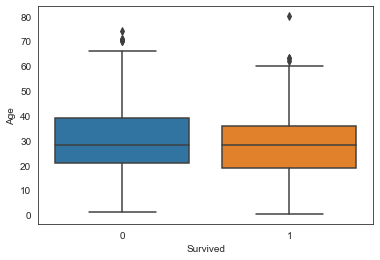

In [17]:
ax = sns.boxplot(x="Survived", y="Age", data=titanic)

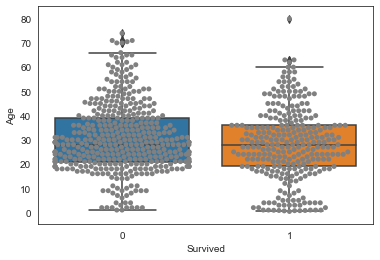

In [18]:
# Since different type of distribution can be hidden under the same box.
# Add jitter over boxplot

ax = sns.boxplot(x="Survived", y="Age", data=titanic)
ax = sns.swarmplot(x='Survived', y='Age', data=titanic, color="grey")

## Countplot

A countplot is kind of likea histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.


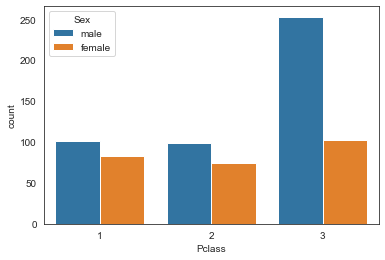

In [25]:
ax = sns.countplot(x="Pclass", hue="Sex", data=titanic)

## Pair plot

The default pairs plot in seaborn only plots numerical columns. If both axes are the same, it plots a histogram. We can color the figures based on a categorical variable such as gender. We need to use the "hue" keyword in the sns.pairplot function call.

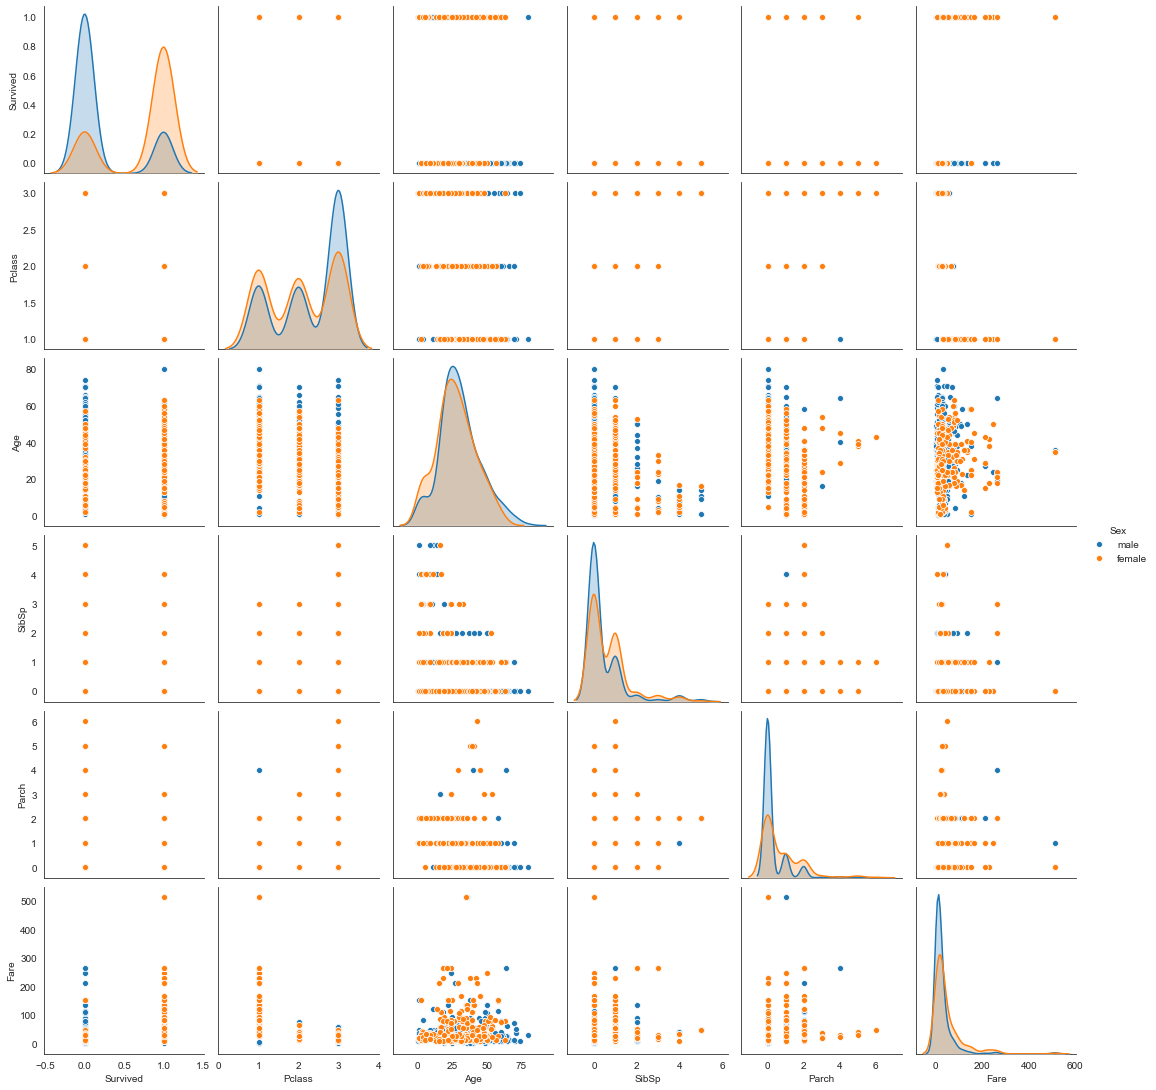

In [27]:
ax =sns.pairplot(titanic, hue ="Sex")

Source: [Dataquest - Conditional Plots](https://app.dataquest.io/m/152/conditional-plots/1/introduction-to-seaborn)